<a href="https://colab.research.google.com/github/ZorkDaNerd/CS345-Text-Recognition/blob/main/Text_Recognition_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*This notebook is part of our text recognition project for class CS345 at Colorado State University.
Original versions were created by Zachary Shimpa, Jenelle Dobyns and Jordan Rust.
The content is availabe [on GitHub](github.com/ZorkDaNerd/CS345-Text-Recognition).*

*Code help and referance was provided from Prof. Asa Ben-Hur and CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions of these notebooks were created by Asa Ben-Hur with updates by Ross Beveridge.
The content is availabe [on his GitHub](https://github.com/asabenhur/CS345).*

<a href="https://colab.research.google.com/github/ZorkDaNerd/CS345-Text-Recognition/blob/main/Text_Recognition_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Possible data sets

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
Dataset from this

https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy#:~:text=Just%20a%20small%20addition%3A%20In%20updated%20Keras%20and,to%20plt.plot%20%28history.history%20%5B%27accuracy%27%5D%29%20plt.plot%20%28history.history%20%5B%27val_accuracy%27%5D%29%20%28N.B.

https://medium.com/mlearning-ai/sentiment-analysis-using-lstm-21767a130857

https://en.wikipedia.org/wiki/Sentiment_analysis

https://valueml.com/sentiment-analysis-using-keras

https://towardsdatascience.com/sentiment-analysis-on-amazon-reviews-45cd169447ac

https://paperswithcode.com/dataset/imdb-movie-reviews

https://www.kaggle.com/code/shubhamptrivedi/sentiment-analysis-on-imdb-movie-reviews

https://www.kaggle.com/code/sohamdas27/imdb-movie-review-eda-sentiment-analysis

https://www.kaggle.com/code/zhangwei20220818/imbd-sentiment-analysis-using-pytorch-lstm

https://www.kaggle.com/code/vincentman0403/sentimental-analysis-on-imdb-by-lstm

https://www.kaggle.com/code/drscarlat/imdb-sentiment-analysis-keras-and-tensorflow/notebook

# Description of Project

This project is about comparing sentiment analysis accuracy between LSTM, SVM, logistic regression, and random forest classification models. This is a form of natural language processing.

We will be using an IMDB review dataset with 50,000 reviews and classification as either 'positive' or 'negative'.


### Coding languages and packages used in project

Language: Python

ML libraries: Tensorflow, Keras

Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import os
from glob import glob
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
from wordcloud import WordCloud,STOPWORDS
import string
import re

Let's import our data

In [ ]:
imdb_data=pd.read_csv("https://github.com/ZorkDaNerd/CS345-Text-Recognition/raw/main/Datasets/IMDB%20Dataset/IMDB%20Dataset.csv")

# Let's see what our data looks like
print(imdb_data.head(10))

# Sentiment count - We can see that our data is perfectly balanced
print(imdb_data['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive
positive    25000
negative    25000
Name: sentiment, dtype: int64


Time to clean up our data a bit! We can see we have lots of punctuation and characters as well as HTML tags. Let's do some housekeeping.

In [ ]:
# Importing 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer

 # Removing html tags - this can't be done in numpy as we need to remove what's between the tags as well
imdb_data.review=imdb_data.review.str.replace('<[^<]+?>','')

# Our stopwords are words that don't contribute to word sentiment ('and','or', etc.). Set stopwords to english:
stop = set(stopwords.words('english'))

# Removing the stopwords from our array
tokenizer=ToktokTokenizer()

def remove_stopwords(text, is_lower_case=False):
    #Tokenizing separates all of our words into their own bucket
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens] 

    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
    
#Apply remove_stopwords on review column
imdb_data['review'] = imdb_data['review'].apply(remove_stopwords).str.lower()

# Our stemming function will return us just the root of our words - i.g. 'stayed' and 'staying' both become 'stay'
ps = PorterStemmer()
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
        
        
    string=" ".join(L)    
    return string


imdb_data['review'] = imdb_data['review'].apply(stem)

# Let's see what we have!
imdb_data.head()

C:\Users\9898z\AppData\Local\Temp\ipykernel_32216\3064731751.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  imdb_data.review=imdb_data.review.str.replace('<[^<]+?>','')


,review,sentiment
0,one review mention watch 1 oz episod ' hooked....,positive
1,wonder littl production. film techniqu unassum...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic ' famili littl boy ( jake ) think ' zomb...,negative
4,"petter mattei ' "" love time money "" visual stu...",positive


Let's convert our data to a numpy array for faster data preprocessing and cleaning

In [ ]:
imdb_data = np.array(imdb_data)

#50,000 rows, 2 columns
imdb_data.shape

#Access our reviews column
imdb_data[:,0]

#Access our sentiment column
imdb_data[:,1]

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

Let's use numpy to remove unneeded punctuation from our dataset that don't contribute to the overall sentiment of our reviews

In [ ]:
def remove_punctuation(text):
    stripPunct = str.maketrans('', '', string.punctuation)
    return np.array([i.translate(stripPunct) for i in text])

def sentiment_to_bool(text):
    text[text == 'positive'] = 1
    text[text == 'negative'] = 0
    return text

#Apply functions on review column
imdb_data[:,0] = remove_punctuation(imdb_data[:,0])
imdb_data[:,1] = sentiment_to_bool(imdb_data[:,1])

Define X and y

In [ ]:
X = imdb_data[:,0]

imdb_data[:,1] = imdb_data[:,1].astype(str).astype(int) # We want our y values to be ints

y = imdb_data[:,1]

Now that our data is cleaned up, let's make a train/test split 80/20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

We convert the words into numbers for the LSTM to process. This is done by first tokenizing each words as numbers (with a maximum of 5000 words), then using text_to_word_sequence  on both our train and test sets.

In [ ]:
print(X_train[0]) # Data before conversion

from keras.preprocessing.text import Tokenizer    
from keras.preprocessing.text import text_to_word_sequence 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_vector = tokenizer.texts_to_sequences(X_train)
X_test_vector = tokenizer.texts_to_sequences(X_test)

print(X_train_vector[0]) # Data after conversion

excel reason edison went straight video  would land theater crumbl thud movi last entir long peril boring notch lowbrow  thank freeman spacey  obvious spare two week next film   bad guy laughabl action near nonexist justin timberlak  acting hate knock guy  sooner realiz pop fort  betterth movi  bad  mostly like fact cool j given appear shot lead man deserv it  unlik fellow musician costar  act kevin spacey almost alway enjoy well  see gulp sever time chew sceneri   freeman abil elev flick three star  ten   good  when said done  ultim error movi mundan tiresom piec pseudoact poppycock fail keep anyon awake also fail make anyon give good crap characters   plain boring said  rent suffer insomnia 
[240, 138, 337, 706, 299, 13, 843, 545, 2, 132, 252, 116, 1534, 2863, 477, 2838, 3995, 430, 2475, 41, 835, 301, 1, 22, 72, 1256, 113, 684, 3023, 2907, 1148, 420, 1750, 72, 4529, 421, 1014, 4859, 2, 22, 4, 95, 497, 2297, 281, 184, 151, 173, 57, 460, 60, 630, 1346, 2680, 2489, 32, 1504, 3995, 136, 

Now we're going to normalize our data by making each review have the same number of elements (50). We'll be truncating reviews that have over 50 elements and pading reviews with under 50 elements.

In [ ]:
from keras.utils import pad_sequences
lenRev = 50
X_train_vector = pad_sequences(X_train_vector, padding='post', maxlen=lenRev)
X_test_vector = pad_sequences(X_test_vector, padding='post', maxlen=lenRev)

print(X_train_vector[0]) # Let's verify that a review over 50 words gets truncated to 50
print(X_train_vector[4]) # Let's verify that a review under 50 words gets padding added at the end

[ 460   60  630 1346 2680 2489   32 1504 3995  136  127   77   17    9
  310    6 3548 1269 2838 1009 2621  335  200   88  646    5  215  143
  758 2580    2 4014 4579  277  383  179  175   26  383    7  175   55
    5  535  799  890 1534  215  419  745]
[   6  454 2754    2  273  562   51   58   23    8  627  166  340  161
  447   72  476   29  148   45 1459  681 2161   23   45  132  181    2
  170  469  162  448   25   60  595   38  578 1451  332   63 1019  937
    1    4    3   67  547  669 1095  213]


Now we'll convert our train and test sets to tensor objects so the keras is able to analyze it.

In [ ]:
X_train_vector_tensor = tf.convert_to_tensor(X_train_vector)
X_test_vector_tensor = tf.convert_to_tensor(X_test_vector)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

Initializing the keras LSTM model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
from keras import backend as K
from keras.optimizers import Adam
from keras.layers import Dropout

model = Sequential([Embedding(10000, 17), 
                   GlobalAveragePooling1D(),
                   Dense(17,activation = "relu"),
                   Dense(12,activation = "relu"),
                   Dense(1,activation = "sigmoid")])


myoptimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(
    loss = "binary_crossentropy",
    optimizer = myoptimizer,
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 17)          170000    
                                                                 
 global_average_pooling1d (G  (None, 17)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 17)                306       
                                                                 
 dense_1 (Dense)             (None, 12)                216       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 170,535
Trainable params: 170,535
Non-trainable params: 0
__________________________________________________

Fit to the LSTM keras model

In [ ]:
history = model.fit(X_train_vector_tensor, y_train_tensor, validation_data=(X_test_vector_tensor, y_test_tensor), epochs=10, verbose = 1, shuffle = True, batch_size = 25)


Epoch 1/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6500 - accuracy: 0.7369 - val_loss: 0.5464 - val_accuracy: 0.8290
Epoch 2/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.4328 - accuracy: 0.8444 - val_loss: 0.3647 - val_accuracy: 0.8497
Epoch 3/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.3321 - accuracy: 0.8623 - val_loss: 0.3332 - val_accuracy: 0.8594
Epoch 4/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.3037 - accuracy: 0.8732 - val_loss: 0.3266 - val_accuracy: 0.8632
Epoch 5/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.2889 - accuracy: 0.8806 - val_loss: 0.3247 - val_accuracy: 0.8635
Epoch 6/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.2791 - accuracy: 0.8856 - val_loss: 0.3256 - val_accuracy: 0.8640
Epoch 7/10
1600/1600 [==============================] - 4s 3ms/step - loss: 0.2718 - accuracy: 0.8878 - val_loss: 0.3276 - val_accuracy:

Calculate the accuracy for our LSTM model on our test set.

In [ ]:
loss, accuracy = model.evaluate(X_test_vector_tensor, y_test_tensor)
print("Accuracy is : ", accuracy*100)

313/313 [==============================] - 1s 1ms/step - loss: 0.3366 - accuracy: 0.8581
Accuracy is :  85.80999970436096


# Model accuracy/loss plots



Here are the plots of our model accuracy and model loss as a function of number of epochs.

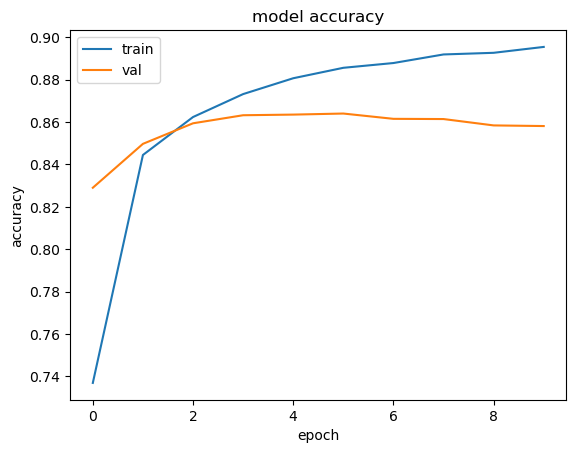

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

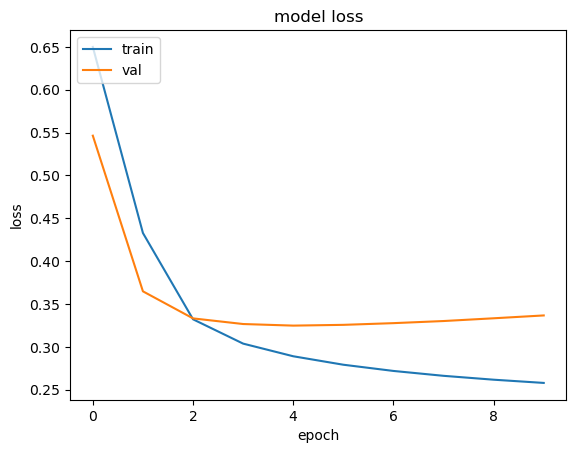

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Test the model

In [ ]:
sample = "The product was very terrifying and awful."  # Change this to your own custom input to see how the prediction changes!
sample = sample.translate(str.maketrans('', '', string.punctuation)).lower()
sample = sample.split()
sample = [word for word in sample if word not in stop]
sample

['product', 'terrifying', 'awful']

Tokenize the sample to numbers

In [ ]:
sample = tokenizer.texts_to_sequences(sample)
sample
simple_list = []
for sublist in sample:
    for item in sublist:
        simple_list.append(item)
simple_list = [simple_list]
sample_review = pad_sequences(simple_list, padding='post', maxlen=lenRev)

Predict the sample

In [ ]:
ans = model.predict(sample_review)
ans

1/1 [==============================] - 0s 96ms/step


array([[0.16750011]], dtype=float32)

Tell whether the sample is positive or negative

In [ ]:
if (0.4 <= ans <= 0.6):
    print("The review is not too good nor too bad")
if(ans>0.6):
    print("The review is positive")
elif(ans<0.4):
    print("The review is negative")

The review is negative


# Part 2: SVM/Logistic Regression/Random Forest

For this section, we're going to re-vectorize our original dataframe using the tf-idf approach for each word in our reviews and sic simpler, non-neural network classifiers on them.

TF-IDF stands for Term Frequency-Inverse Document Frequency.

It is meant to determine how important a word is to a review. For each word, it takes the frequency of that term in each review and compares it to the number of reviews that have that term to decide how important each word is. Words with a higher TF-IDF score are more important.

First, let's do some importing.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Now we'll vectorize our data using the TF-IDF approach.

In [ ]:
# Let's use the tf-idf approach to vectorize our data

tfd = TfidfVectorizer(ngram_range=(1,3), max_features=5000)

X_vector = tfd.fit_transform(X)

X_vector = X_vector.toarray()

X_vector.shape

(50000, 5000)

Now we'll create a new train/test set using our new tf-idf vectors.

In [ ]:
X_train_tfd, X_test_tfd, y_train_tfd, y_test_tfd = train_test_split(X_vector, y, test_size=0.20, random_state=5)
y_train_tfd = y_train_tfd.astype(int)
y_test_tfd = y_test_tfd.astype(int)

It's time to run our models!

# SVM


In [ ]:
# SVM

svc = SVC(kernel='linear')
svc.fit(X_train_tfd, y_train_tfd)

SVC(kernel='linear')

The accuracy of the SVM model is:  88.23
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4900
           1       0.88      0.89      0.89      5100

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<AxesSubplot:>

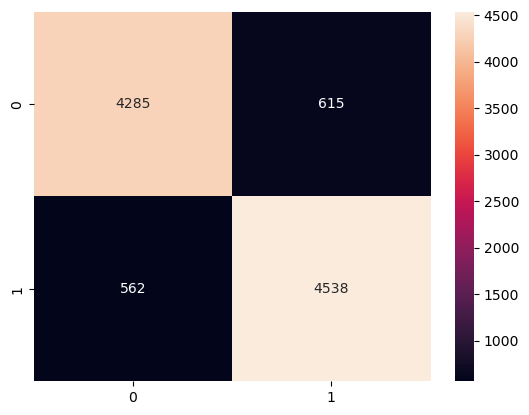

In [ ]:
print("The accuracy of the SVM model is: ", svc.score(X_test_tfd,y_test_tfd)*100)
predictions_svc=svc.predict(X_test_tfd)
print(classification_report(y_test_tfd,predictions_svc))
cm=confusion_matrix(y_test_tfd,predictions_svc)
sns.heatmap(cm,annot=True,fmt='d')

# Logistic Regression

In [ ]:
# Logistic Regression

lr=LogisticRegression()
lr.fit(X_train_tfd,y_train_tfd)

LogisticRegression()

The accuracy of the LR model is:  88.86
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4900
           1       0.88      0.90      0.89      5100

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<AxesSubplot:>

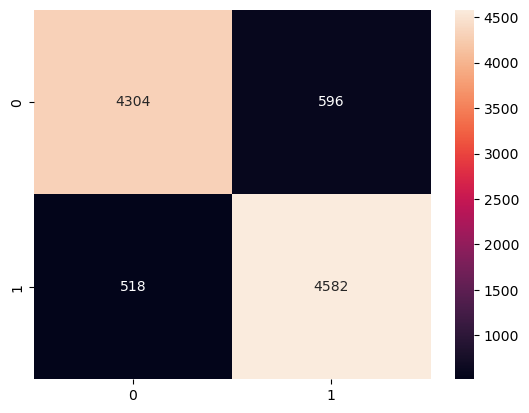

In [ ]:
print("The accuracy of the LR model is: ", lr.score(X_test_tfd,y_test_tfd)*100)
predictions_lr=lr.predict(X_test_tfd)
print(classification_report(y_test_tfd,predictions_lr))
cm=confusion_matrix(y_test_tfd,predictions_lr)
sns.heatmap(cm,annot=True,fmt='d')

# Random Forest Classifier

In [ ]:
# Random Forest

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfd,y_train_tfd)

RandomForestClassifier()

The accuracy of the Random Forest model is:  84.84
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4900
           1       0.86      0.84      0.85      5100

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



<AxesSubplot:>

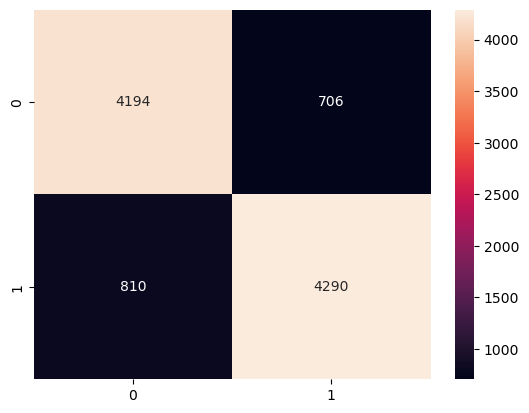

In [ ]:
print("The accuracy of the Random Forest model is: ", rf.score(X_test_tfd,y_test_tfd)*100)
predictions_rf=rf.predict(X_test_tfd)
print(classification_report(y_test_tfd,predictions_rf))
cm=confusion_matrix(y_test_tfd,predictions_rf)
sns.heatmap(cm,annot=True,fmt='d')

Let's compare the accuracies of our 3 models.

In [ ]:
print("SVM: " + str(svc.score(X_test_tfd, y_test_tfd)))
print("RF: " + str(rf.score(X_test_tfd, y_test_tfd)))
print("LR: " + str(lr.score(X_test_tfd, y_test_tfd)))

SVM: 0.8823
RF: 0.8484
LR: 0.8886


And, let's add in our accuracy from our LSTM...

In [ ]:
loss, accuracy = model.evaluate(X_test_vector_tensor, y_test_tensor)

print("LSTM: " + str(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8581
LSTM: 0.8580999970436096


# Analysis of results

## LSTM


We found that the highest accuracy of the validation set is acheved with smaller amounts of epochs. Once we go past 2 or 3 the accuracy starts to plane out and won't achieve any higher accuracy. The higher the epochs the lower the accuracy and the higher the loss.

We tried to fix this by modifying multiple factors of the keras LSTM model. 

First we decreased the learning rate of the "adam" optimizer to 0.0001 and found some marginal increases in the accuracy and decreases in the loss.

We then tried to add a dropout to our model of .2, this did make our graphs look better but would also remove a lot of the data.

After that we tried to change the density and amount of layers both with varying results but none of them really gave us any better data than what we already had. Same with changing the activation of the layers.

Callouts also just removed data and didnt really improve our results much.

In the end, we decided that highest accuracy of our LSTM model on the validation set was most important. We weren't able to see clear overfitting with the number of epochs we iterated through. It is possible that, with higher epoch iterations, we could see this -- however, this is a job for when we have more time and higher computing power.

## Simple Classifiers


After utilizing the TF-IDF tokenization approach, we saw overall high accuracies across our SVM, LR, and RF models. TF-IDF is a powerful tokenization tool for machine learning models.

Of our three models, we found that our logistic regression model performed the best. It also had the highest time efficiency.


Logistic regression seems like a decidedly good choice for this kind of sentiment analysis as it is meant for classification problems with labels that are discrete 1/0 values. It uses the sigmoid function to find the relationship between variables and map numbers to values between, but never exactly, 0 and 1.

(As it turns out, the LSTM also uses a sigmoid layer in its processing.)

In the future -- and with more time and computing power -- we could do a grid search with our logistic regression model to further tune our classifier and find the best parameters for the highest accuracy.

# Summary

Overall, we found the highest accuracy in prediction of IMDB reviews in our logistic regression model, although all of our models performed similarly with accuracies in the mid 80% for each.

One point of surprise for us is the differences in accuracies between our simple classification models and our LSTM neural network.

We expected that LSTM would yield a higher accuracy as a deep learning application. We did a lot of fine tuning to our hyperparameters but weren't able to consistently get an accuracy higher than that of our linear regression model. 

This may be a sign that more complex doesn't always mean better. Logistic regression seems to be the best fit for this sentiment analysis problem despite its simplicity. In the future, we would love to test our models on more datasets to see the variations on how these models perform.